In [6]:
import numpy as np
import os
from skimage.io import imread, imsave
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import glob
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

[1, 417.0, 26.0, 593.0, 193.0]
[0, 104.0, 153.0, 229.0, 282.0]
[0, 223.0, 92.0, 359.0, 228.0]
[0, 303.0, 345.0, 465.0, 469.0]
[0, 390.0, 189.0, 534.0, 337.0]
[0, 534.0, 176.0, 671.0, 310.0]
[0, 498.0, 264.0, 641.0, 381.0]
[0, 680.0, 2.0, 805.0, 115.0]
[0, 773.0, 63.000000000000014, 897.0, 187.0]
[0, 870.0, 120.0, 1006.0, 268.0]
[0, 748.0, 249.0, 901.0, 366.0]
[0, 902.0, 233.0, 1019.0, 348.0]
[0, 1020.0, 200.0, 1159.0, 329.0]
[0, 1178.0, 154.0, 1321.0, 291.0]
[0, 1129.0, 209.0, 1273.0, 340.0]
[0, 575.0, 290.0, 732.0, 434.0]
[0, 473.0, 349.0, 626.0, 488.0]
[0, 173.0, 394.00000000000006, 323.0, 540.0]
[0, 1081.0, 2.0, 1194.0, 124.0]
[0, 1133.0, 78.0, 1283.0, 200.0]
[0, 1284.0, 77.0, 1434.0, 248.0]
[0, 1408.0, 78.0, 1535.0, 222.0]
[0, 1289.0, 209.0, 1428.0, 326.0]
[0, 1309.0, 295.0, 1446.0, 429.0]
[0, 1676.0, 30.0, 1815.0, 157.0]
[0, 1690.0, 124.0, 1848.0, 246.0]
[0, 1495.0, 90.0, 1638.0, 240.0]
[0, 1524.0, 205.0, 1644.0, 353.0]
[0, 1778.0, 204.0, 1922.0, 335.0]
[0, 1897.0, 277.0, 2041.0, 

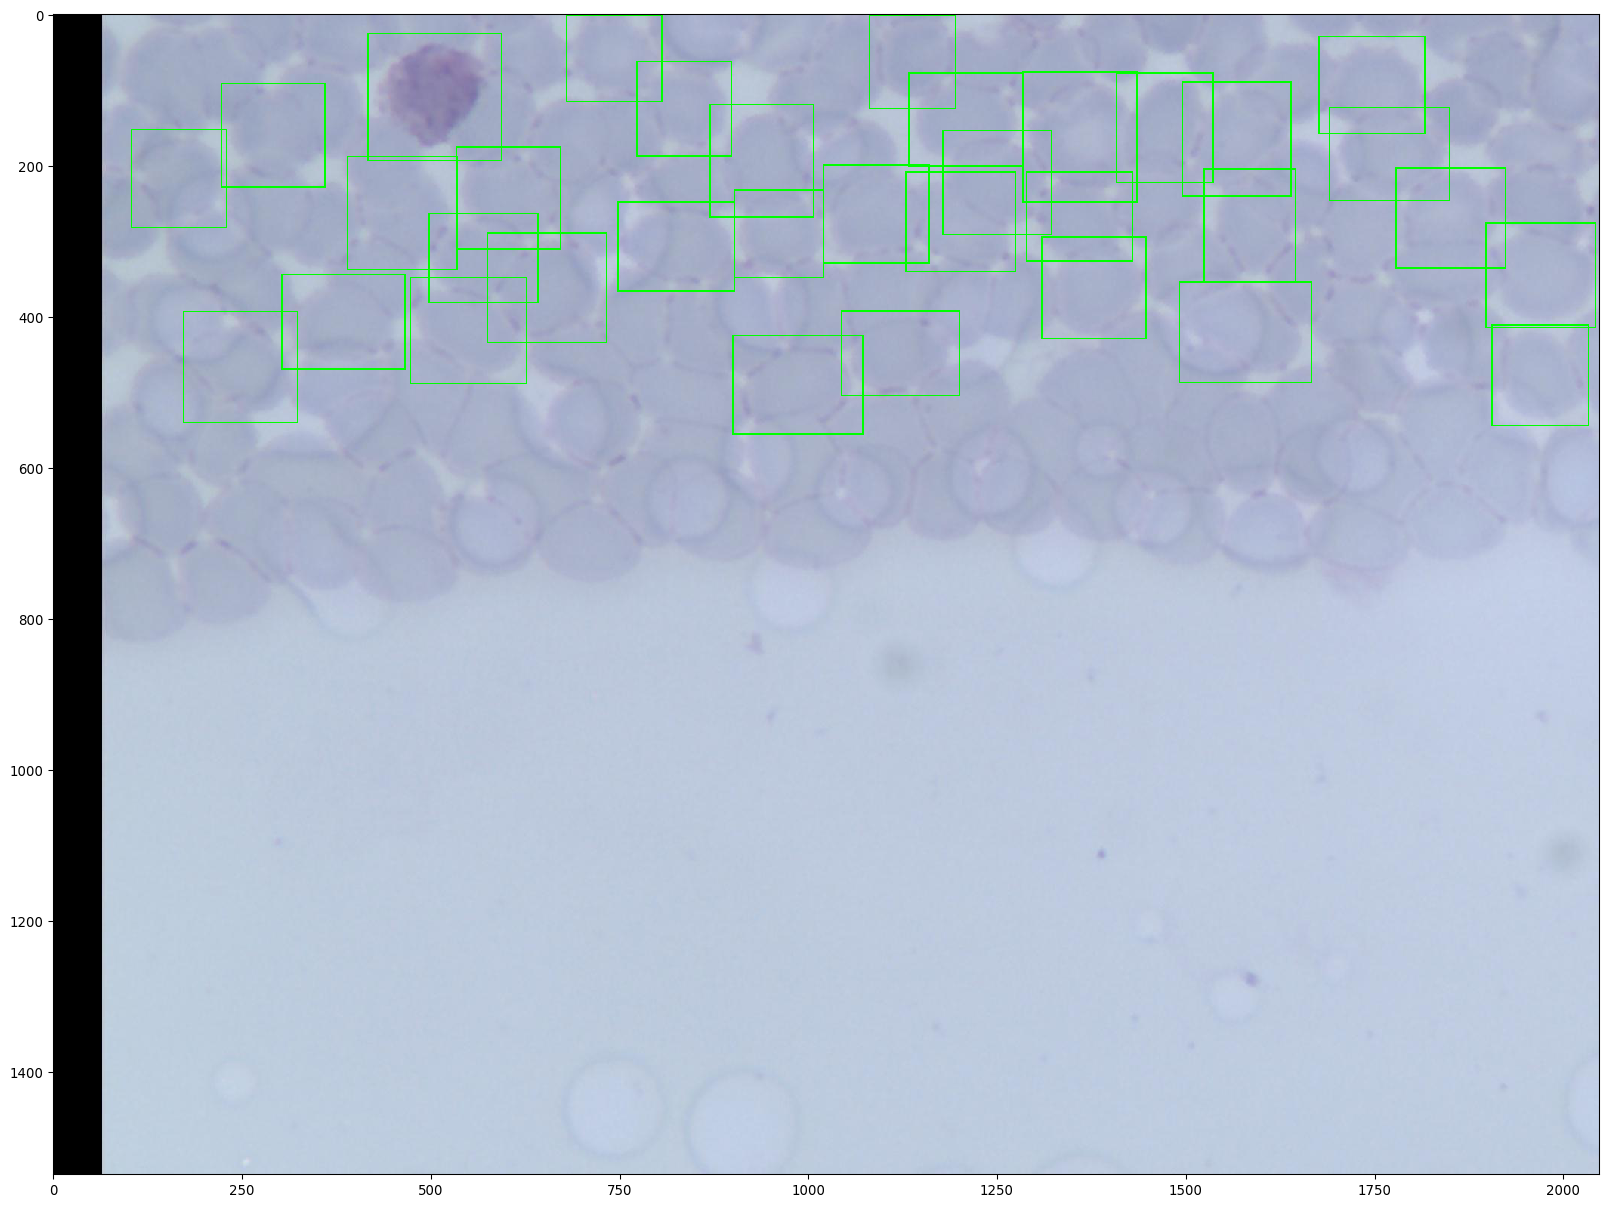

In [7]:
# f = open("data/custom/train.txt","r")
# images = list(f)
# f.close()
# print(images[0])
rects = []
img = imread("data/custom/images/po-train-0000006874.jpg")
height,weigth,channel = img.shape

f = open("data/custom/labels/po-train-0000006874.txt","r")
bboxs = list(f)
f.close()
for box in bboxs:
    coor = box.split()
    label = int(coor[0])
    xc = float(coor[1])*weigth
    yc = float(coor[2])*height
    bb_w = float(coor[3])
    bb_h = float(coor[4])
    w = bb_w*weigth
    h = bb_h*height
    x1 = xc-(w/2)
    y1 = yc-(h/2)
    x2 = x1 + bb_w*weigth
    y2 = y1 + bb_h*height
    print([label,x1,y1,x2,y2])
    rects.append(BoundingBox(x1=x1,y1=y1,x2=x2,y2=y2,label=label))
bbs = BoundingBoxesOnImage(rects,shape=img.shape)
ia.imshow(bbs.draw_on_image(img, size=2))

In [ ]:
# f = open("data/custom/valid.txt","r")
# files = list(f)
# f.close()
# labels = ["negative", "positive"]
# counts = [0,0]
# for file in files:
#     txt_path = file.replace("images","labels").replace(".jpg",".txt").rstrip()
#     img_path = file.rstrip()
#     img = Image.open(img_path)
#     weigth,height = img.size
#     img_ng = Image.open(img_path)
#     img_pos = Image.open(img_path)
# #     print(img.size)
#     print(txt_path)
#     f = open(txt_path,"r")
#     bboxs = list(f)
#     f.close()
#     save_name = file.split("/")[3].rstrip()
#     for box in bboxs:
#         coor = box.split()
#         label = int(coor[0])
#         xc = float(coor[1])*weigth
#         yc = float(coor[2])*height
#         bb_w = float(coor[3])
#         bb_h = float(coor[4])
#         w = bb_w*weigth
#         h = bb_h*height
#         x1 = xc-(w/2)
#         y1 = yc-(h/2)
#         x2 = x1 + bb_w*weigth
#         y2 = y1 + bb_h*height
#         if label == 0:
#             draw_ng = ImageDraw.Draw(img_ng)
#             draw_ng.rectangle((x1, y1, x2, y2), fill=None,outline="blue",width=3)
#             counts[label] += 1
#         elif label == 1:
#             draw_pos = ImageDraw.Draw(img_pos)
#             draw_pos.rectangle((x1, y1, x2, y2), fill=None,outline="red",width=3)
#             counts[label] += 1
#     save_path = os.path.join("ground-truth",labels[0], save_name)
#     print(save_path)
#     img_ng.save(save_path)
    
#     save_path = os.path.join("ground-truth",labels[1], save_name)
#     print(save_path)
#     img_pos.save(save_path)
# #         print([label,x1,y1,x2,y2])

In [ ]:
# print(counts)

In [ ]:
# f = open("2012_train.txt","r")
# boxs = list(f)
# f.close()
# box = boxs[19].split()
# print(box[0])
# img = imread(box[0])
# bbox = box[1:]
# rects = []
# for bb in bbox:
#     x1, y1, x2, y2, label = bb.split(',')
#     print([label,x1,y1,x2,y2])
#     x1 = int(x1)
#     y1 = int(y1)
#     x2 = int(x2)
#     y2 = int(y2)
    
#     rects.append(BoundingBox(x1=x1,y1=y1,x2=x2,y2=y2,label=label))
    
# bbs = BoundingBoxesOnImage(rects,shape=img.shape)
# ia.imshow(bbs.draw_on_image(img, size=2))